<a href="https://colab.research.google.com/github/Yuwin2008/Confusion-matrix/blob/main/C117_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Uploading csv
from google.colab import files
uploaded=files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [40]:
import pandas as pd
df=pd.read_csv("BankNote_Authentication.csv")
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [48]:
from sklearn.model_selection import train_test_split

X=df[["variance"]]
Y=df["class"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(variance_train.ravel(),(len(variance_train),1))
Y = np.reshape(Class_train.ravel(),(len(Class_train),1))

classifier=LogisticRegression(random_state=0)
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#X_test=np.reshape(X_train.ravel(),(len(X_train),1))
#Y_test=np.reshape(Y_train.ravel(),(len(Y_train),1))
prediction=classifier.predict(X_test)

predicted_value=[]
for i in prediction:
  if i==0:
    predicted_value.append("Autherized")
  else:
    predicted_value.append("Forged")

actual_value=[]
for i in Y_test.ravel():
  if i==0:
    actual_value.append("Autherized")
  else:
    actual_value.append("Forged")

[Text(0, 0.5, 'Autherized'), Text(0, 1.5, 'Forged')]

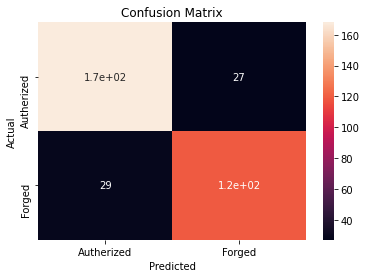

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labels=["Autherized","Forged"]
cm=confusion_matrix(actual_value,predicted_value,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [52]:
tn,tp,fp,fn=confusion_matrix(Y_test,prediction).ravel()
print(tn)
print(tp)

168
27


In [53]:
accuracy=(tn+tp)*100/(tn+tp+fn+fp)
print(accuracy)

56.85131195335277
